## Characteristics of a Time Series Data
```
To better forecast the time series, we need to understand the time series data better. Studying the past behavior of the time series data can help us understand the patterns in the data, which in turn can help us make better forecasts.
```

In [62]:
# necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.offline as pyo

### 1. Trend
```
Trend is the general direction in which something tends to move. A trend is a continued increase or decrease in the series over time. There can be upward trend and downward trend in the series. 
```

<span style="color:green">A trend could be:</span>
- <span style="color:green">Upward trend:</span> When the value of the time series increases over a period of time, then it is said to be an upward trend.
- <span style="color:green">Downward trend:</span> When the value of the time series decreases over a period of time, then it is said to be a downward trend.
- <span style="color:green">Stationary trend:</span> When the value of the time series neither increases nor decreases over a period of time, then it is said to be a stationary trend.

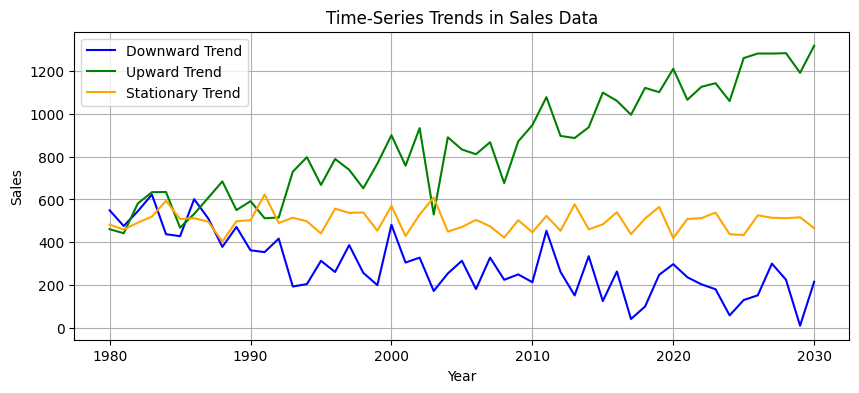

In [54]:
# Generate time-series data for downward trend
np.random.seed(42)
years = np.arange(1980, 2031)
downward_trend = 500 * np.exp(-0.02 * (years - 1980)) + np.random.normal(scale=100, size=len(years))

# Generate time-series data for upward trend
upward_trend = 500 * np.exp(0.02 * (years - 1980)) + np.random.normal(scale=100, size=len(years))

# Generate time-series data for stationary trend
stationary_trend = 500 + np.random.normal(scale=50, size=len(years))

# Plot all three trends in one plot
plt.figure(figsize=(10, 4))

plt.plot(years, downward_trend, label='Downward Trend', color='blue')
plt.plot(years, upward_trend, label='Upward Trend', color='green')
plt.plot(years, stationary_trend, label='Stationary Trend', color='orange')

plt.title('Time-Series Trends in Sales Data')
plt.xlabel('Year')
plt.ylabel('Sales')
plt.legend()
plt.grid(True)
plt.show()


### 2. Seasonality

```
Seasonality is a characteristic of a time series in which the data experiences regular and predictable changes that recur every calendar year. Any predictable change or pattern in a time series that recurs or repeats over a one-year period can be said to be seasonal.
```

<span style="color:green">Types of seasonality:</span>
- <span style="color:green">Time of day:</span> 
    Patterns or fluctuations in a time-series that occur within a single day, reflecting variations at different times of the day.
- <span style="color:green">Daily:</span> The demand for certain products and services can be affected by the day of the week. For example, the demand for movie tickets is high on weekends and low on weekdays.
- <span style="color:green">Weekly:</span> Regular patterns or fluctuations in a time-series that repeat every week, reflecting variations influenced by weekly routines, events, or activities.
- <span style="color:green">Monthly:</span> Repeating patterns or fluctuations in a time-series that occur on a monthly basis, often influenced by billing cycles, holidays, or other monthly occurrences.
- <span style="color:green">Quarterly:</span> Periodic patterns or fluctuations in a time-series that repeat every quarter (three months), reflecting variations related to business cycles, reporting periods, or other quarterly events.
- <span style="color:green">Yearly:</span> Recurring patterns or fluctuations in a time-series that repeat annually, reflecting variations influenced by annual events, holidays, or environmental changes over the course of a year.


In [58]:
df_temp = pd.read_csv("../data/daily-min-temperatures.csv")
df_temp.head()

,Date,Temp
0,1981-01-01,20.7
1,1981-01-02,17.9
2,1981-01-03,18.8
3,1981-01-04,14.6
4,1981-01-05,15.8


In [66]:
# Plot using plotly
fig = px.line(df_temp, x='Date', y='Temp')
# indicate seasonality
fig.update_xaxes(
    rangeslider_visible=True,
    rangeselector=dict(
        buttons=list([
            dict(count=1, label='1y', step='year', stepmode='backward'),
            dict(count=2, label='3y', step='year', stepmode='backward'),
            dict(count=3, label='5y', step='year', stepmode='backward'),
            dict(step='all')
        ])
    )
)
# label the axes
fig.update_layout(
    title="Daily Minimum Temperatures in Melbourne, Australia",
    xaxis_title="Date",
    yaxis_title="Temperature (Celsius)"
)
fig.show()

### 3. Cyclicity
```
Cyclicity is a characteristic of a time series in which the data experiences regular and predictable changes that recur at intervals of more than one year. Any predictable change or pattern in a time series that recurs or repeats over a period of more than one year can be said to be cyclical. 
```

### 4. Irregularity
```
Irregularity is a characteristic of a time series in which the data experiences irregular and unpredictable changes. Any unpredictable change or pattern in a time series that does not recur or repeat over a period of time can be said to be irregular. 
```

In [75]:
import matplotlib.pyplot as plt
import numpy as np

# Generate time-series data with irregularity
np.random.seed(42)
years = np.arange(1980, 2031)
trend = 0.1 * (years - 1980)  # simple upward trend
seasonality = 20 * np.sin(2 * np.pi * (years - 1980) / 10)  # sinusoidal seasonality
irregularity = np.random.normal(scale=50, size=len(years))  # random irregularity

# Combine trend, seasonality, and irregularity
time_series = trend + seasonality + irregularity

# Plot the time-series with irregularity
fig = px.line(x=years, y=time_series)
fig.update_layout(
    title="Time-Series with Irregularity",
    xaxis_title="Year",
    yaxis_title="Value"
)
fig.show()

### 5. Stationarity
```
Stationarity is a characteristic of a time series in which the statistical properties of the series such as mean, variance and autocorrelation are constant over time. A stationary time series is relatively easy to predict. Most statistical forecasting methods are based on the assumption that the time series can be rendered approximately stationary (i.e., "stationarized") through the use of mathematical transformations. 
```

![Stationarity](../data/stationarity_ts_1.png) 

The above figure shows three non-stationary series.
 - First plot shows that means of the series is increasing over time. Hence, it is not a stationary series.
 - Second plot shows that the variance is a function of time. Hence, it is not a stationary series.
 - Third plot shows that the covariance is not constant with time. Hence, it is not a stationary series.

However, the plot given below shows a stationary series.

![Stationarity](../data/stationarity_ts_2.png)
- The mean is constant over time.
- The variance is also constant.
- The covariance is also constant.

The figures are taken from [here](https://www.analyticsvidhya.com/blog/2018/09/non-stationary-time-series-python/).


### 6. Outliers
```
Outliers are data points that are far from other data points. They may be due to variability in the measurement or may indicate experimental errors. Outliers can adversely affect the training process of a machine learning algorithm, resulting in a loss of accuracy. 
```

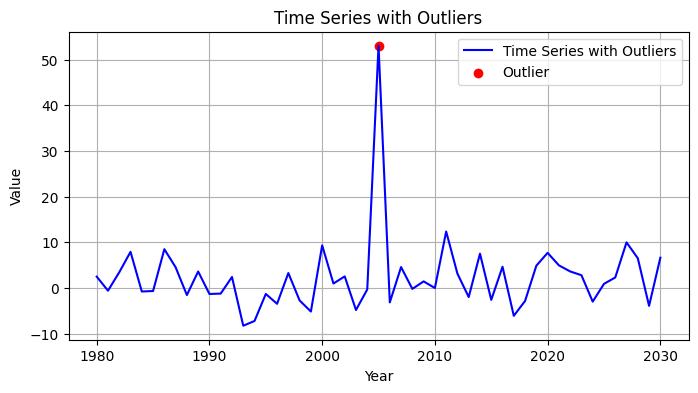

In [106]:
np.random.seed(42)
years = np.arange(1980, 2031)
num_years = len(years)

# Generate time series with outliers
time_series_with_outliers = 0.1 * (years - 1980) + np.random.normal(scale=5, size=num_years)
time_series_with_outliers[years == 2005] += 50  # Introducing an outlier in the year 2005

# Plot time series with outliers
plt.figure(figsize=(8, 4))
plt.plot(years, time_series_with_outliers, label='Time Series with Outliers', color='blue')
plt.scatter(2005, time_series_with_outliers[years == 2005], color='red', label='Outlier')
plt.title('Time Series with Outliers')
plt.xlabel('Year')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()